In [1]:
#This code block was designated to import some neccessary modules

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# About the Dataset
This dataset (MovieLens 25M Dataset) describes 5-star rating and free-text tagging activity from MovieLensLinks to an external site., a movie recommendation service. It contains 25,000,095 ratings and 1,093,360 tag applications across 62,423 movies. These data were created by 162,541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

In [2]:
# Read the CSV files into separate dataframes
genome_scores_df = pd.read_csv('genome-scores.csv')
genome_tags_df = pd.read_csv('genome-tags.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')

# Combine the dataframes into a single dataframe using pd.concat()
df = pd.concat([genome_scores_df, genome_tags_df, links_df, movies_df, ratings_df, tags_df], axis=1)

# Drop any duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

In [3]:
df.head()

,movieId,tagId,relevance,tag,imdbId,tmdbId,title,genres,userId,rating,timestamp
0,1.0,1.0,0.02875,007,114709.0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,5.0,1147880044
1,1.0,2.0,0.02375,007 (series),113497.0,8844.0,Jumanji (1995),Adventure|Children|Fantasy,1,3.5,1147868817
2,1.0,3.0,0.06250,18th century,113228.0,15602.0,Grumpier Old Men (1995),Comedy|Romance,1,5.0,1147868828
3,1.0,4.0,0.07575,1920s,114885.0,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,5.0,1147878820
4,1.0,5.0,0.14075,1930s,113041.0,11862.0,Father of the Bride Part II (1995),Comedy,1,3.5,1147868510


### (1) How many movies are released each year? What is the percentage of change over time?

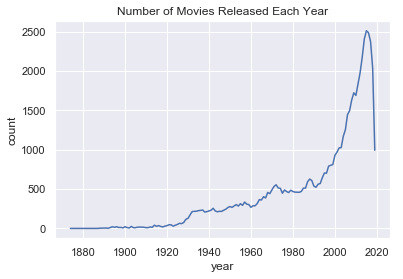

In [4]:
# Read the movies.csv file into a Pandas DataFrame
df1 = pd.read_csv('movies.csv')

# load the movies data
df1 = pd.read_csv('movies.csv')

# extract the year from the title using regular expressions
df1['year'] = df1['title'].str.extract('\((\d{4})\)', expand=False)

# convert the year to numeric data type
df1['year'] = pd.to_numeric(df1['year'], errors='coerce')

# drop rows with missing values in the year column
df1.dropna(subset=['year'], inplace=True)

# group the movies by year and count the number of movies in each year
movies_per_year = df1.groupby('year').size()

# plot the number of movies released over time
sns.set(style="darkgrid")
movies_per_year = df1.groupby('year').size().reset_index(name='count')
sns.lineplot(x="year", y="count", data=movies_per_year)
plt.title('Number of Movies Released Each Year')
plt.show()

#### <center>Figure A: Number of Movies Released Each Year</center>

In [5]:
# Group movies by year and calculate the count
movies_per_year = df1.groupby('year').size()

# Calculate the percentage change of movie releases per year
movies_per_year_pct_change = movies_per_year.pct_change()

# Create a new DataFrame
df2 = pd.DataFrame({'count': movies_per_year, 'pct_change': movies_per_year_pct_change})

df2 = df2.reset_index()

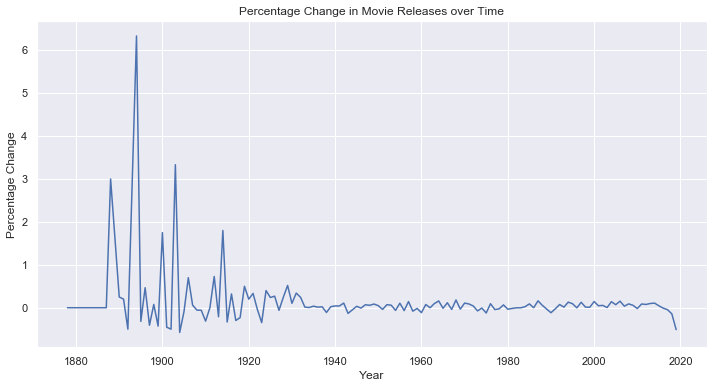

In [6]:
sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='pct_change', data=df2)
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change in Movie Releases over Time')
plt.show()

#### <center>Figure B: Percentage Change in Movie Releases over Time</center>

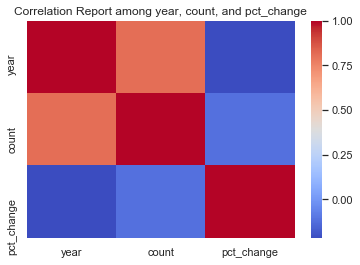

In [7]:
# Calculate the correlation matrix
corr = df2.corr()

# Create a heatmap
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Report among year, count, and pct_change')
# Show the plot
plt.show()

#### <center>Figure C: Correlation Report among year, count, and pct_change</center>

### (2) What are the most popular genre of movies?

In [ ]:
# Extract the "genres" column
genres = df['genres']

# Split the genres into separate tags
genre_tags = genres.str.split('|')

# Create a list of all genre tags
genre_list = genre_tags.explode()

# Count the occurrences of each genre
genre_counts = genre_list.value_counts()

# Plot the genre counts
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Counts of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

### (3) Does the taste of movies changes over time?

### (4) What are the top 20 movies that has the top amount of users rating and has the highest rate?

In [10]:
# Group ratings by movie ID and calculate count and average rating
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Sort the grouped dataframe in descending order
sorted_ratings = grouped_ratings.sort_values(by=[('rating', 'count'), ('rating', 'mean')], ascending=False)

# Select the top 20 movies
top_movies = sorted_ratings.head(20)

# Merge with movies dataframe to retrieve movie information
top_movies_with_info = pd.merge(top_movies, movies_df, left_index=True, right_on='movieId')

# Reset the index
top_movies_with_info = top_movies_with_info.reset_index(drop=True)

# Rename the first and second column headers
top_movies_with_info = top_movies_with_info.rename(columns={('rating', 'count'): 'rating count', ('rating', 'mean'): 'rating mean'})

# Select the desired columns
selected_columns = ['movieId', 'title','rating mean']
top_movies_selected = top_movies_with_info[selected_columns]

# Display the resulting dataframe
top_movies_selected

C:\Users\Pay2Rent.LSHANKS\Downloads\ANACONDA\lib\site-packages\pandas\core\reshape\merge.py:544: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,movieId,title,rating mean
0,356,Forrest Gump (1994),4.048011
1,318,"Shawshank Redemption, The (1994)",4.413576
2,296,Pulp Fiction (1994),4.188912
3,593,"Silence of the Lambs, The (1991)",4.151342
4,2571,"Matrix, The (1999)",4.154099
5,260,Star Wars: Episode IV - A New Hope (1977),4.120189
6,480,Jurassic Park (1993),3.679175
7,527,Schindler's List (1993),4.247579
8,110,Braveheart (1995),4.002273
9,2959,Fight Club (1999),4.228311


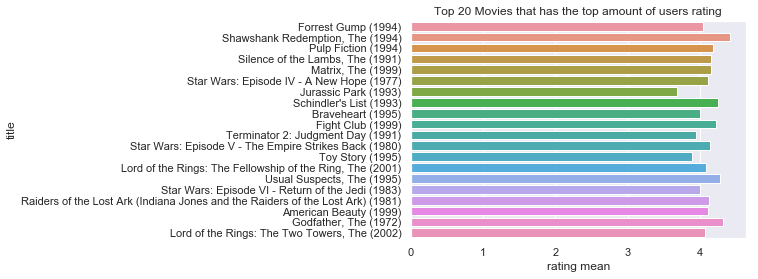

In [12]:
# Create the bar plot
sns.barplot(x='rating mean', y='title', data=top_movies_selected)

# Set the plot title
plt.title('Top 20 Movies that has the top amount of users rating')

# Show the plot
plt.show()

### (5) What is the most of popular season for releasing movies?

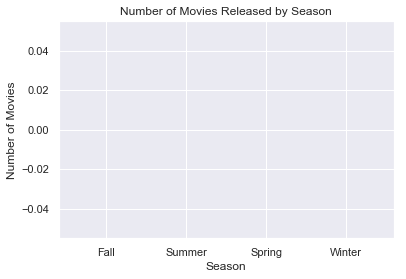

In [14]:
# Extract the season from the year
df1['season'] = pd.cut(df1['year'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'])

# Count the number of movies in each season
season_counts = df1['season'].value_counts()

# Plot the count of movies by season
plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Season')
plt.show()